# 3. Scoring Chart

This notebook show that when we induce a pathology, its correct and a realiable detection.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Current work
print(os.getcwd())
# Change directory 2 level up
os.chdir("..")
os.chdir("..")
os.chdir("..")

print(os.getcwd())
# Look for the file in the directory
print(os.listdir())

/tmp/ipykernel_36318/2635443006.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/home/jose/Git/SE-AP/experiments/experiment_1/notebooks
/home/jose/Git/SE-AP
['models', 'todo.md', '.pre-commit-config.yaml', 'demos', '.gitignore', 'experiments', 'include', '.git', '.env', 'README.md', '.env-example', 'LICENSE', 'model_technique_pathology_scores.csv']


In [2]:
model = "dolphin"
temperature = 0.3
prompt_technique = "chain"

In [3]:
df = pd.read_csv(f'experiments/experiment_1/results/{model}/scores_{prompt_technique}_{model}_{temperature}.csv')
#df = pd.read_csv(f'experiments/experiment_1/results/human/resultados_patologias.csv')
df[df['Iteration'] == 1]

,Depression,Trait Anxiety,Eating Disorder,Alcohol Addiction,Impulsivity,Schizophrenia,Obsessive Compulsive Disorder,Apathy,Social Anxiety,Induced Pathology,Iteration
0,0.500000,0.066667,0.025641,0.025,0.177778,0.511628,0.000000,0.000000,0.527778,No Pathology,1
1,0.766667,0.983333,0.487179,0.025,0.622222,0.813953,0.200000,0.944444,0.722222,Depression,1
2,0.700000,0.950000,0.602564,0.025,0.722222,0.767442,1.000000,0.907407,0.666667,Trait Anxiety,1
3,0.933333,0.966667,0.692308,0.025,0.533333,0.790698,0.766667,1.000000,0.805556,Eating Disorder,1
4,0.683333,0.850000,0.705128,0.950,0.844444,0.813953,0.816667,0.944444,0.666667,Alcohol Addiction,1
5,0.650000,0.850000,0.717949,0.950,0.833333,0.813953,0.650000,0.500000,0.652778,Impulsivity,1
6,0.733333,0.966667,0.910256,0.000,0.555556,0.813953,0.800000,0.666667,0.680556,Schizophrenia,1
7,0.666667,1.000000,0.961538,0.075,0.466667,0.813953,1.000000,0.777778,0.500000,Obsessive Compulsive Disorder,1
8,0.700000,0.616667,0.346154,0.025,0.544444,0.813953,0.250000,1.000000,0.486111,Apathy,1
9,0.683333,0.816667,0.115385,0.100,0.466667,0.651163,1.000000,0.759259,0.680556,Social Anxiety,1


In [4]:
df_means = df.groupby(['Induced Pathology']).mean().reset_index()

pathologies_i = [
    "No Pathology",
    "Depression",
    "Trait Anxiety",
    "Eating Disorder",
    "Alcohol Addiction",
    "Impulsivity",
    "Schizophrenia",
    "Obsessive Compulsive Disorder",
    "Apathy",
    "Social Anxiety",
]

df_means['Induced Pathology'] = pd.Categorical(df_means['Induced Pathology'], categories=pathologies_i, ordered=True)

df_means = df_means.sort_values('Induced Pathology').reset_index(drop=True)

df_stds = df.groupby(['Induced Pathology']).std().reset_index()
df_stds['Induced Pathology'] = pd.Categorical(df_stds['Induced Pathology'], categories=pathologies_i, ordered=True)
df_stds = df_stds.sort_values('Induced Pathology').reset_index(drop=True)
df_means

,Induced Pathology,Depression,Trait Anxiety,Eating Disorder,Alcohol Addiction,Impulsivity,Schizophrenia,Obsessive Compulsive Disorder,Apathy,Social Anxiety,Iteration
0,No Pathology,0.192000,0.089833,0.220000,0.02875,0.256889,0.350233,0.119833,0.028333,0.487083,50.5
1,Depression,0.730000,0.978667,0.506410,0.25175,0.615667,0.753023,0.425667,0.939259,0.653611,50.5
2,Trait Anxiety,0.695833,0.968833,0.576154,0.07575,0.636333,0.730233,0.894333,0.828148,0.675417,50.5
3,Eating Disorder,0.745333,0.956833,0.653462,0.03100,0.524333,0.724651,0.408833,0.749444,0.702153,50.5
4,Alcohol Addiction,0.649833,0.864500,0.596923,0.93000,0.691778,0.712791,0.525667,0.881296,0.631528,50.5
5,Impulsivity,0.611667,0.817667,0.640641,0.85700,0.788889,0.729767,0.728000,0.249074,0.584861,50.5
6,Schizophrenia,0.764000,0.979000,0.745513,0.04625,0.664889,0.793953,0.849000,0.850926,0.638958,50.5
7,Obsessive Compulsive Disorder,0.667500,0.992500,0.552692,0.04100,0.545889,0.779535,0.937333,0.840926,0.660694,50.5
8,Apathy,0.660667,0.538000,0.353077,0.07250,0.660556,0.746279,0.049667,0.987593,0.583889,50.5
9,Social Anxiety,0.612667,0.898667,0.496026,0.04200,0.555333,0.752093,0.793667,0.834815,0.704028,50.5


In [5]:
alturas_indicadores = {
    'Depression': 0.5,
    'Trait Anxiety': 0.3,
    'Eating Disorder': 0.256,
    'Alcohol Addiction': 0.5,
    'Impulsivity': 0.467,
    'Schizophrenia': 0.461,
    'Obsessive Compulsive Disorder': 0.399,
    'Apathy': 0.389,
    'Social Anxiety': 0.444
}

In [6]:
df_no_no_pathology = df_means[df_means['Induced Pathology'] != 'No Pathology']
no_pathology_row = df_means.loc[df_means['Induced Pathology'] == 'No Pathology']
no_pathology_scores_corrected = no_pathology_row.iloc[0][1:-1]

pathologies = df_no_no_pathology['Induced Pathology']
own_pathology_scores = df_no_no_pathology.apply(lambda row: row[row['Induced Pathology']], axis=1)
own_pathology_scores = own_pathology_scores.reset_index(drop=True)

std_errors = df_stds[df_stds['Induced Pathology'] != 'No Pathology'].reset_index(drop=True)
std_errors = std_errors.apply(lambda row: row[row['Induced Pathology']], axis=1)
no_pathology_std = df_stds.loc[df_stds['Induced Pathology'] == 'No Pathology'].iloc[0, 1:-1]

own_pathology_scores

0    0.730000
1    0.968833
2    0.653462
3    0.930000
4    0.788889
5    0.793953
6    0.937333
7    0.987593
8    0.704028
dtype: float64

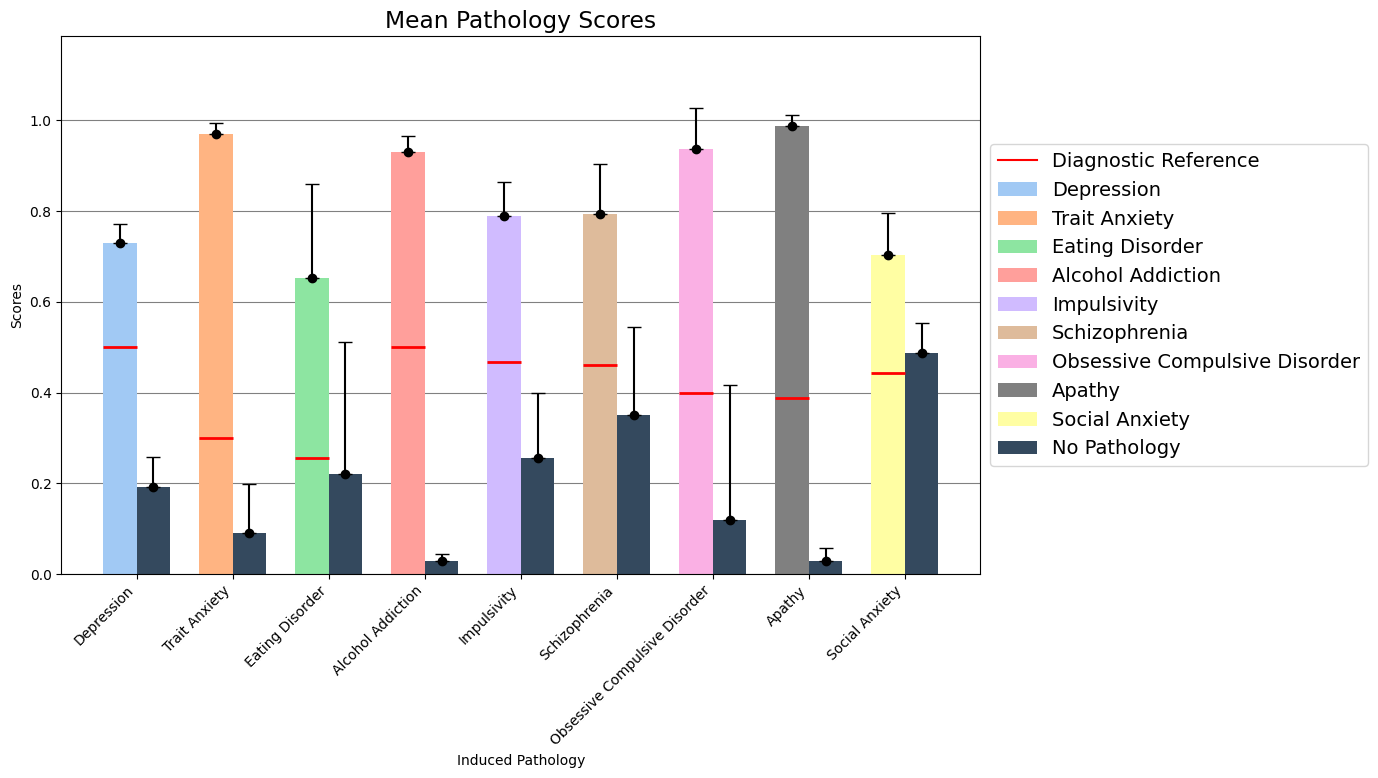

In [7]:
df_no_no_pathology = df_means[df_means['Induced Pathology'] != 'No Pathology']
no_pathology_row = df_means.loc[df_means['Induced Pathology'] == 'No Pathology']
no_pathology_scores_corrected = no_pathology_row.iloc[0][1:-1]

pathologies = df_no_no_pathology['Induced Pathology']
own_pathology_scores = df_no_no_pathology.apply(lambda row: row[row['Induced Pathology']], axis=1)
own_pathology_scores = own_pathology_scores.reset_index(drop=True)

std_errors = df_stds[df_stds['Induced Pathology'] != 'No Pathology'].reset_index(drop=True)
std_errors = std_errors.apply(lambda row: row[row['Induced Pathology']], axis=1)

alturas_indicadores = {
    'Depression': 0.5,
    'Trait Anxiety': 0.3,
    'Eating Disorder': 0.256,
    'Alcohol Addiction': 0.5,
    'Impulsivity': 0.467,
    'Schizophrenia': 0.461,
    'Obsessive Compulsive Disorder': 0.399,
    'Apathy': 0.389,
    'Social Anxiety': 0.444
}

sns.set_palette("pastel")
unique_categories = pathologies.tolist() + ['No Pathology']
category_colors = sns.color_palette("pastel", len(unique_categories))
color_map = dict(zip(unique_categories, category_colors))
color_map['Apathy'] = '#808080'
color_map['No Pathology'] = '#34495e'

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('white')

bar_width = 0.35
index = np.arange(len(pathologies))

plt.rcParams.update({'font.size': 14})

for i, pathology in enumerate(pathologies):
    ax.bar(i, own_pathology_scores.loc[i], bar_width, label=pathology, color=color_map[pathology])

bars2 = ax.bar(index + bar_width, [no_pathology_scores_corrected.loc[pathology] for pathology in pathologies], bar_width, label='No Pathology', color=color_map['No Pathology'])

for i, pathology in enumerate(pathologies):
    ax.errorbar(i, own_pathology_scores.loc[i], yerr=[[0], [std_errors.loc[i]]], fmt='o', color='black', capsize=5, uplims=False)

for i, pathology in enumerate(pathologies):
    ax.errorbar(index[i] + bar_width, 
                no_pathology_scores_corrected.loc[pathology], 
                yerr=[[0], [no_pathology_std.iloc[i]]],
                fmt='o', color='black', capsize=5, uplims=False)
    
for i, pathology in enumerate(pathologies):
    ax.hlines(y=alturas_indicadores[pathology], xmin=i - bar_width / 2, xmax=i + bar_width / 2, colors='red', linestyles='-', lw=2)

ax.plot([], [], color='red', label='Diagnostic Reference')

ax.grid(which='major', axis='y', linestyle='-', linewidth=0.8, color='grey')
ax.set_axisbelow(True)

ax.set_xlabel('Induced Pathology')
ax.set_ylabel('Scores')
ax.set_title('Mean Pathology Scores')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(pathologies, rotation=45, ha="right")

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
plt.tight_layout()
plt.show()